# Hill Climbing: Maximizando f(x) = -(x-3)² + 9

## Introducción

**Hill Climbing** (Escalada de Colina) es un algoritmo de optimización local que busca encontrar el máximo (o mínimo) de una función mediante una estrategia simple pero efectiva: siempre moverse hacia la dirección que mejore el resultado.

### La Analogía

Imagina que estás en una montaña con los ojos vendados y quieres llegar a la cima:

1. 🎯 Sientes el terreno alrededor tuyo
2. 📊 Identificas qué dirección sube más
3. 🚶 Das un paso en esa dirección
4. 🔁 Repites hasta que ya no puedas subir más

### Nuestro Problema

En este notebook, aplicaremos Hill Climbing para maximizar la siguiente función cuadrática:

$$f(x) = -(x-3)^2 + 9$$

**Características del problema:**
- 📈 **Función:** Una parábola invertida (forma de ∩)
- 🎯 **Máximo global:** En x = 3, donde f(3) = 9
- 📏 **Dominio restringido:** x debe estar siempre en el intervalo [0, 6]
- 🎲 **Punto de inicio:** Aleatorio dentro del dominio

### Concepto Clave: Restricción de Dominio (Clipping)

Una parte fundamental de este ejercicio es el **clipping** o **restricción de dominio**. Esto significa que:

- ✅ Cualquier solución propuesta debe estar dentro de [0, 6]
- 🔒 Si un vecino calculado cae fuera del intervalo, se ajusta al límite más cercano
- 🛡️ Ejemplo: Si calculamos x = 6.3, lo ajustamos a x = 6.0

Esta técnica es crucial en problemas de optimización del mundo real, donde las soluciones deben cumplir restricciones físicas o prácticas.

## 1. Definiendo la Función Objetivo

La función que vamos a maximizar es:

$$f(x) = -(x-3)^2 + 9$$

### Análisis Matemático

Esta es una **parábola invertida** (abre hacia abajo) con las siguientes características:

- **Forma estándar:** $f(x) = -a(x-h)^2 + k$, donde:
  - $a = 1$ (determina la "apertura" de la parábola)
  - $h = 3$ (coordenada x del vértice)
  - $k = 9$ (coordenada y del vértice)

- **Vértice (punto máximo):** $(3, 9)$
  - En x = 3, la función alcanza su valor máximo de 9

- **Comportamiento:**
  - Cuando x < 3: la función crece al acercarse a 3
  - Cuando x = 3: alcanza el máximo (f(3) = 9)
  - Cuando x > 3: la función decrece al alejarse de 3

### ¿Por qué es ideal para Hill Climbing?

Esta función tiene un **único máximo global**, lo que garantiza que Hill Climbing lo encontrará sin importar desde dónde empecemos (siempre y cuando esté en el dominio [0, 6]).

🔍 Verificación de la función f(x) = -(x-3)² + 9
f(0) = 0.00
f(3) = 9.00  ← Máximo esperado
f(6) = 0.00


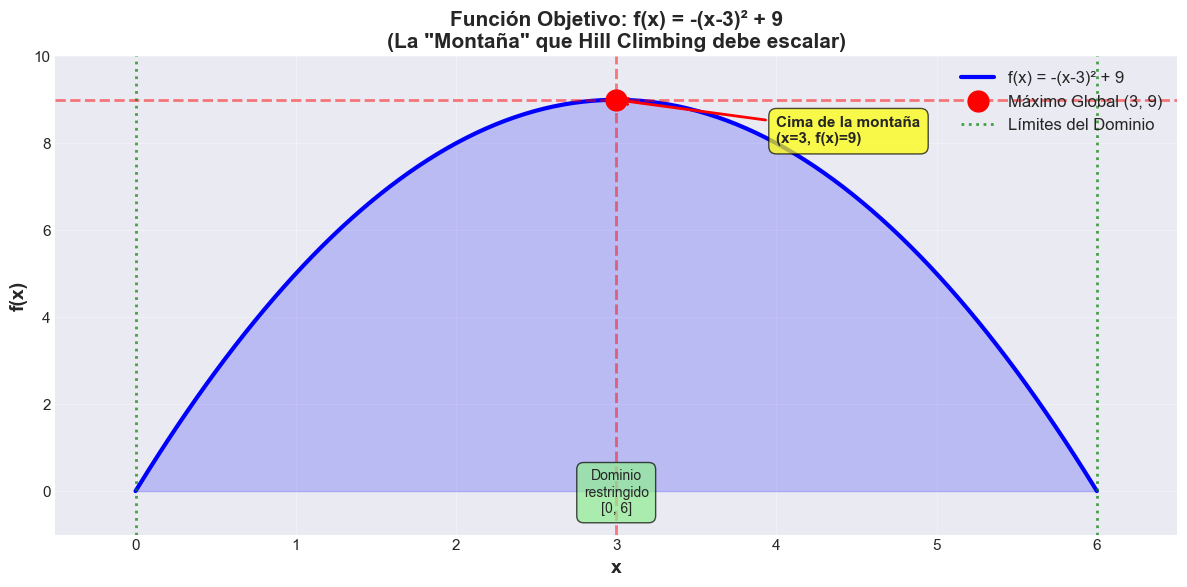


✅ Función objetivo definida y visualizada correctamente


In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import random

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Definir la función objetivo
def f(x):
    """
    Función cuadrática (parábola invertida) a maximizar.
    
    Fórmula: f(x) = -(x-3)² + 9
    
    Parámetros:
    -----------
    x : float o array
        Valor(es) de x para evaluar la función
        
    Retorna:
    --------
    float o array : Valor(es) de f(x)
    """
    return -(x - 3)**2 + 9

# Verificar la función en algunos puntos clave
print("🔍 Verificación de la función f(x) = -(x-3)² + 9")
print("="*60)
print(f"f(0) = {f(0):.2f}")
print(f"f(3) = {f(3):.2f}  ← Máximo esperado")
print(f"f(6) = {f(6):.2f}")
print("="*60)

# Visualizar la función en el dominio [0, 6]
x_valores = np.linspace(0, 6, 300)  # 300 puntos para una curva suave
y_valores = f(x_valores)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(x_valores, y_valores, 'b-', linewidth=3, label='f(x) = -(x-3)² + 9')

# Marcar el máximo global
plt.plot(3, 9, 'ro', markersize=15, label='Máximo Global (3, 9)', zorder=5)
plt.axvline(x=3, color='red', linestyle='--', linewidth=2, alpha=0.5)
plt.axhline(y=9, color='red', linestyle='--', linewidth=2, alpha=0.5)

# Marcar los límites del dominio
plt.axvline(x=0, color='green', linestyle=':', linewidth=2, alpha=0.7, label='Límites del Dominio')
plt.axvline(x=6, color='green', linestyle=':', linewidth=2, alpha=0.7)

# Sombrear la región del dominio
plt.fill_between(x_valores, y_valores, alpha=0.2, color='blue')

# Configurar la gráfica
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('f(x)', fontsize=14, fontweight='bold')
plt.title('Función Objetivo: f(x) = -(x-3)² + 9\n(La "Montaña" que Hill Climbing debe escalar)', 
          fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=12)
plt.xlim(-0.5, 6.5)
plt.ylim(-1, 10)

# Añadir anotaciones
plt.annotate('Cima de la montaña\n(x=3, f(x)=9)', 
             xy=(3, 9), xytext=(4, 8),
             fontsize=11, fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.annotate('Dominio\nrestringido\n[0, 6]', 
             xy=(3, -0.5), fontsize=10, ha='center',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n✅ Función objetivo definida y visualizada correctamente")

## 2. Implementando el Algoritmo Hill Climbing

Ahora implementaremos el algoritmo Hill Climbing con restricción de dominio (clipping).

### Lógica del Algoritmo

El algoritmo sigue estos pasos:

1. **Inicializar:** Comenzar en un valor x aleatorio dentro de [0, 6]

2. **Generar vecinos:** Calcular dos posibles movimientos:
   - Vecino derecha: x + paso
   - Vecino izquierda: x - paso

3. **⚠️ RESTRICCIÓN DE DOMINIO (CLIPPING):** 
   - Antes de evaluar los vecinos, asegurar que estén en [0, 6]
   - Si un vecino < 0 → ajustar a 0
   - Si un vecino > 6 → ajustar a 6
   - Fórmula: `vecino_ajustado = max(0, min(6, vecino))`

4. **Evaluar vecinos:** Calcular f(x) para cada vecino ajustado

5. **Decidir:**
   - Si el mejor vecino tiene **mayor valor** que x actual → moverse al vecino
   - Si ningún vecino mejora → **detenerse** (hemos llegado al máximo)

6. **Repetir:** Volver al paso 2 hasta que el algoritmo se detenga

### ¿Por qué es importante el Clipping?

Sin el clipping:
- ❌ El algoritmo podría proponer x = 7.5 (fuera del dominio)
- ❌ Violaríamos las restricciones del problema

Con el clipping:
- ✅ Todos los valores explorados están en [0, 6]
- ✅ La solución final es siempre válida
- ✅ El algoritmo puede "explorar" los límites del dominio

### Tipos de Vecinos

```
Si x = 2.5 y paso = 0.1:
  Vecino izquierda = 2.4 ✅ (dentro del dominio)
  Vecino derecha = 2.6 ✅ (dentro del dominio)

Si x = 5.95 y paso = 0.1:
  Vecino izquierda = 5.85 ✅ (dentro del dominio)
  Vecino derecha = 6.05 → se ajusta a 6.0 ⚠️ (clipping aplicado)
```

In [2]:
def hill_climbing(start_x, step, domain, max_iter=1000):
    """
    Implementa el algoritmo Hill Climbing con restricción de dominio.
    
    Parámetros:
    -----------
    start_x : float
        Valor inicial de x (punto de partida)
    step : float
        Tamaño del paso para explorar vecinos
    domain : tuple
        Tupla (min, max) que define el dominio permitido para x
    max_iter : int
        Número máximo de iteraciones (seguridad contra bucles infinitos)
        
    Retorna:
    --------
    tuple : (x_final, historial)
        - x_final: El mejor valor de x encontrado
        - historial: Lista con todos los valores de x visitados
    """
    
    # Estado inicial
    x_actual = start_x
    f_actual = f(x_actual)
    
    # Historial para visualización
    historial = [x_actual]
    
    print(f"🚀 Iniciando Hill Climbing")
    print(f"📍 Punto inicial: x = {x_actual:.4f}, f(x) = {f_actual:.4f}")
    print(f"📏 Dominio: [{domain[0]}, {domain[1]}]")
    print(f"📊 Tamaño de paso: {step}")
    print("="*70)
    
    # Iteraciones del algoritmo
    iteracion = 0
    mejora = True
    
    while mejora and iteracion < max_iter:
        iteracion += 1
        mejora = False
        
        # Generar vecinos
        vecinos_propuestos = [
            x_actual - step,  # Vecino izquierda
            x_actual + step   # Vecino derecha
        ]
        
        # ⚠️ APLICAR CLIPPING (Restricción de Dominio)
        vecinos_ajustados = []
        for vecino in vecinos_propuestos:
            # Ajustar el vecino al dominio [min, max]
            vecino_clip = max(domain[0], min(domain[1], vecino))
            vecinos_ajustados.append(vecino_clip)
        
        # Evaluar los vecinos
        mejor_vecino = None
        mejor_f = f_actual
        
        for vecino in vecinos_ajustados:
            f_vecino = f(vecino)
            if f_vecino > mejor_f:
                mejor_vecino = vecino
                mejor_f = f_vecino
        
        # Si encontramos un vecino mejor, nos movemos
        if mejor_vecino is not None:
            # Verificar si se aplicó clipping
            clipping_info = ""
            if mejor_vecino == domain[0] or mejor_vecino == domain[1]:
                clipping_info = " 🔒 (clipping aplicado)"
            
            print(f"Iter {iteracion:3d}: x = {x_actual:.4f} → x = {mejor_vecino:.4f} | "
                  f"f(x) = {f_actual:.4f} → {mejor_f:.4f} ✅{clipping_info}")
            
            x_actual = mejor_vecino
            f_actual = mejor_f
            historial.append(x_actual)
            mejora = True
        else:
            print(f"\n🎯 Máximo local alcanzado en iteración {iteracion}")
            print(f"   Ningún vecino mejora el valor actual.")
    
    if iteracion >= max_iter:
        print(f"\n⚠️ Alcanzado el límite de iteraciones ({max_iter})")
    
    print("="*70)
    print(f"\n✅ Algoritmo finalizado")
    print(f"🎯 Solución encontrada: x = {x_actual:.4f}")
    print(f"📊 Valor máximo: f(x) = {f_actual:.4f}")
    print(f"🔄 Total de iteraciones: {len(historial) - 1}")
    print(f"📏 Distancia al óptimo global (x=3): {abs(x_actual - 3):.4f}")
    
    return x_actual, historial

print("✅ Función hill_climbing() implementada correctamente")

✅ Función hill_climbing() implementada correctamente


## 3. Encontrando el Máximo de la Función

Ahora ejecutaremos el algoritmo Hill Climbing para encontrar el máximo de f(x) = -(x-3)² + 9.

### Parámetros del Experimento

- **Dominio:** [0, 6]
- **Tamaño de paso:** 0.1
- **Punto inicial:** Aleatorio en [0, 6]

El algoritmo comenzará desde un punto aleatorio y se moverá iterativamente hacia el máximo de la función, respetando siempre la restricción del dominio mediante clipping.

¡Observa cómo el algoritmo encuentra el máximo global en x = 3, sin importar desde dónde empiece!

In [3]:
# Configurar los parámetros del problema
domain = [0, 6]      # Dominio restringido
step = 0.1           # Tamaño del paso

# Generar un punto de inicio ALEATORIO dentro del dominio
random.seed()  # Asegurar aleatoriedad
start_x = random.uniform(domain[0], domain[1])

print(f"🎲 Punto de inicio aleatorio generado: x = {start_x:.4f}")
print(f"📊 Valor inicial de la función: f({start_x:.4f}) = {f(start_x):.4f}")
print("\n")

# Ejecutar el algoritmo Hill Climbing
x_final, historial = hill_climbing(start_x=start_x, step=step, domain=domain)

# Análisis detallado del resultado
print("\n" + "="*70)
print("📊 ANÁLISIS DETALLADO DE RESULTADOS")
print("="*70)

print(f"\n📍 Trayectoria Completa:")
print(f"   Inicio:  x = {historial[0]:.4f}, f(x) = {f(historial[0]):.4f}")
print(f"   Final:   x = {historial[-1]:.4f}, f(x) = {f(historial[-1]):.4f}")
print(f"   Número de pasos: {len(historial) - 1}")

print(f"\n🎯 Comparación con el Óptimo Global:")
print(f"   Óptimo teórico:     x = 3.0000, f(x) = 9.0000")
print(f"   Solución encontrada: x = {x_final:.4f}, f(x) = {f(x_final):.4f}")
print(f"   Error en x:          {abs(x_final - 3.0):.4f}")
print(f"   Error en f(x):       {abs(f(x_final) - 9.0):.4f}")

print(f"\n📈 Mejora Conseguida:")
mejora = f(x_final) - f(historial[0])
mejora_porcentual = (mejora / f(historial[0])) * 100 if f(historial[0]) != 0 else 0
print(f"   Incremento absoluto: {mejora:.4f}")
print(f"   Incremento porcentual: {mejora_porcentual:.2f}%")

print(f"\n🛣️  Primeros 10 pasos del camino:")
mostrar_pasos = min(10, len(historial))
for i in range(mostrar_pasos):
    print(f"   Paso {i}: x = {historial[i]:.4f}, f(x) = {f(historial[i]):.4f}")
if len(historial) > 10:
    print(f"   ... ({len(historial) - 10} pasos más)")

# Verificar éxito
if abs(x_final - 3.0) < step:
    print(f"\n✅ ¡ÉXITO! El algoritmo encontró el máximo global")
    print(f"   (dentro de la precisión del paso: ±{step})")
else:
    print(f"\n⚠️ El algoritmo se detuvo en un máximo local")

print("="*70)

🎲 Punto de inicio aleatorio generado: x = 5.9997
📊 Valor inicial de la función: f(5.9997) = 0.0016


🚀 Iniciando Hill Climbing
📍 Punto inicial: x = 5.9997, f(x) = 0.0016
📏 Dominio: [0, 6]
📊 Tamaño de paso: 0.1
Iter   1: x = 5.9997 → x = 5.8997 | f(x) = 0.0016 → 0.5915 ✅
Iter   2: x = 5.8997 → x = 5.7997 | f(x) = 0.5915 → 1.1614 ✅
Iter   3: x = 5.7997 → x = 5.6997 | f(x) = 1.1614 → 1.7114 ✅
Iter   4: x = 5.6997 → x = 5.5997 | f(x) = 1.7114 → 2.2413 ✅
Iter   5: x = 5.5997 → x = 5.4997 | f(x) = 2.2413 → 2.7513 ✅
Iter   6: x = 5.4997 → x = 5.3997 | f(x) = 2.7513 → 3.2412 ✅
Iter   7: x = 5.3997 → x = 5.2997 | f(x) = 3.2412 → 3.7112 ✅
Iter   8: x = 5.2997 → x = 5.1997 | f(x) = 3.7112 → 4.1611 ✅
Iter   9: x = 5.1997 → x = 5.0997 | f(x) = 4.1611 → 4.5911 ✅
Iter  10: x = 5.0997 → x = 4.9997 | f(x) = 4.5911 → 5.0010 ✅
Iter  11: x = 4.9997 → x = 4.8997 | f(x) = 5.0010 → 5.3910 ✅
Iter  12: x = 4.8997 → x = 4.7997 | f(x) = 5.3910 → 5.7609 ✅
Iter  13: x = 4.7997 → x = 4.6997 | f(x) = 5.7609 → 6.1109

### 3.1 Visualización del Proceso de Optimización

Ahora visualizaremos cómo el algoritmo Hill Climbing "escaló la montaña" desde el punto inicial aleatorio hasta el máximo de la función.

La gráfica mostrará:
- 🔵 **Curva azul:** La función f(x) = -(x-3)² + 9
- 🔴 **Puntos y líneas rojas:** El camino seguido por el algoritmo
- 🟢 **Punto verde:** El inicio aleatorio
- ⭐ **Estrella amarilla:** El máximo encontrado
- 🎯 **Punto rojo grande:** El máximo global teórico (x=3)

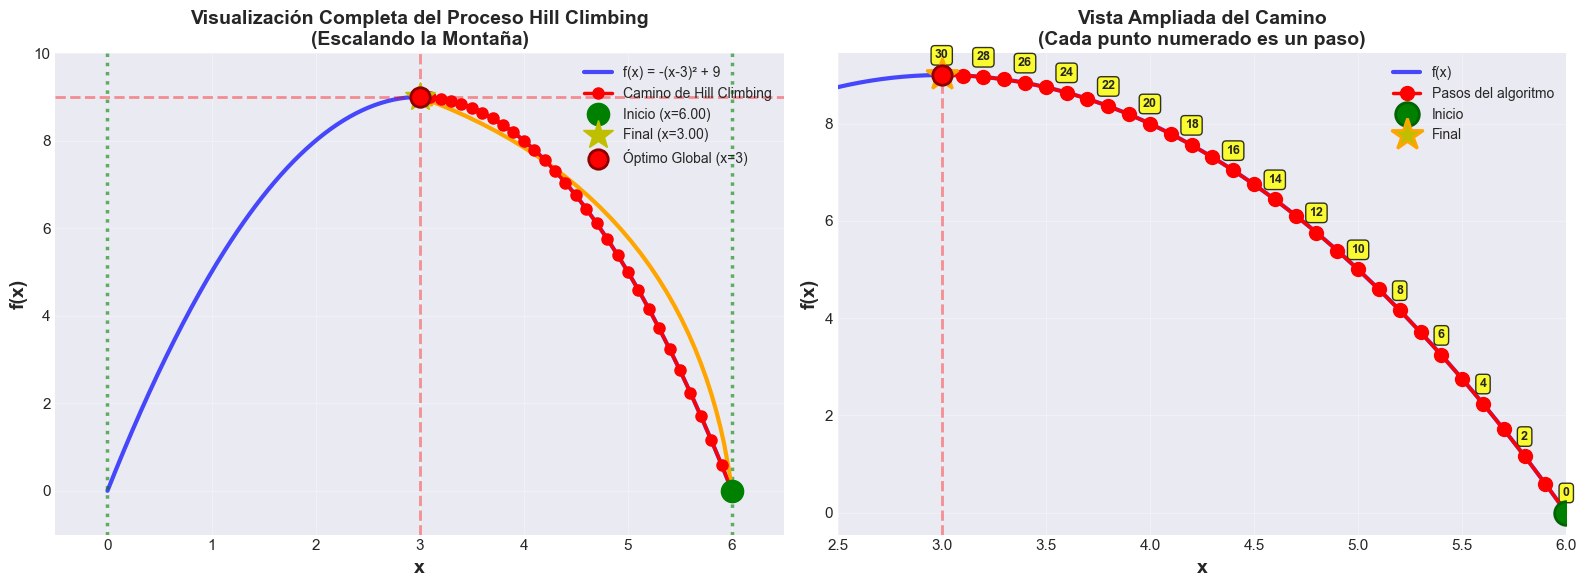

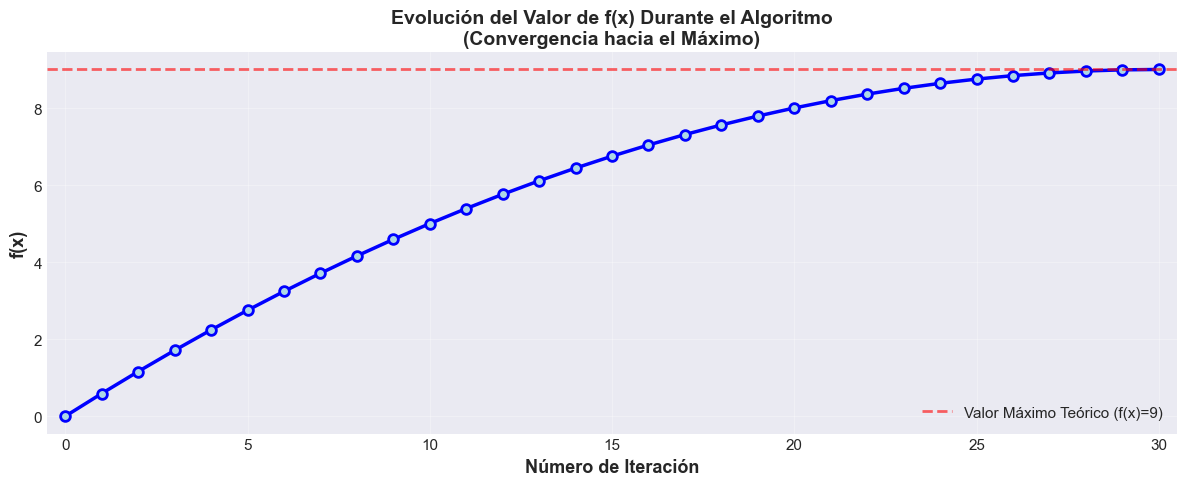


📊 Visualizaciones generadas exitosamente
   • Gráfica 1: Vista completa del proceso
   • Gráfica 2: Vista ampliada con pasos numerados
   • Gráfica 3: Evolución de f(x) por iteración


In [4]:
# Crear visualización completa del proceso
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ===== GRÁFICA 1: Vista completa del proceso =====
# Plotear la función
ax1.plot(x_valores, y_valores, 'b-', linewidth=3, alpha=0.7, label='f(x) = -(x-3)² + 9')

# Plotear el camino del algoritmo
historial_array = np.array(historial)
f_historial = f(historial_array)

ax1.plot(historial, f_historial, 'ro-', linewidth=2.5, markersize=8, 
         label='Camino de Hill Climbing', zorder=5)

# Marcar inicio, fin y óptimo global
ax1.plot(historial[0], f(historial[0]), 'go', markersize=16, 
         label=f'Inicio (x={historial[0]:.2f})', zorder=6)
ax1.plot(historial[-1], f(historial[-1]), 'y*', markersize=22, 
         label=f'Final (x={historial[-1]:.2f})', zorder=6)
ax1.plot(3, 9, 'ro', markersize=14, label='Óptimo Global (x=3)', 
         zorder=6, markeredgewidth=2, markeredgecolor='darkred')

# Líneas de referencia
ax1.axvline(x=3, color='red', linestyle='--', linewidth=2, alpha=0.4)
ax1.axhline(y=9, color='red', linestyle='--', linewidth=2, alpha=0.4)

# Marcar límites del dominio
ax1.axvline(x=0, color='green', linestyle=':', linewidth=2.5, alpha=0.6)
ax1.axvline(x=6, color='green', linestyle=':', linewidth=2.5, alpha=0.6)

# Configuración
ax1.set_xlabel('x', fontsize=14, fontweight='bold')
ax1.set_ylabel('f(x)', fontsize=14, fontweight='bold')
ax1.set_title('Visualización Completa del Proceso Hill Climbing\n(Escalando la Montaña)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10)
ax1.set_xlim(-0.5, 6.5)
ax1.set_ylim(-1, 10)

# Añadir anotación con flecha desde inicio hasta fin
ax1.annotate('', xy=(historial[-1], f(historial[-1])),
            xytext=(historial[0], f(historial[0])),
            arrowprops=dict(arrowstyle='->', color='orange', lw=3, 
                          connectionstyle='arc3,rad=0.3'))

# ===== GRÁFICA 2: Vista ampliada con pasos numerados =====
# Determinar rango de zoom
rango_zoom = max(2, abs(historial[-1] - historial[0]) + 1)
x_min_zoom = max(0, min(historial) - 0.5)
x_max_zoom = min(6, max(historial) + 0.5)

x_zoom = np.linspace(x_min_zoom, x_max_zoom, 200)
f_zoom = f(x_zoom)

ax2.plot(x_zoom, f_zoom, 'b-', linewidth=3, alpha=0.7, label='f(x)')
ax2.plot(historial, f_historial, 'ro-', linewidth=2.5, markersize=10, 
         label='Pasos del algoritmo', zorder=5)

# Numerar cada paso (mostrar solo algunos si hay muchos)
pasos_a_mostrar = range(0, len(historial), max(1, len(historial)//15))
for i in pasos_a_mostrar:
    ax2.annotate(f'{i}', xy=(historial[i], f(historial[i])), 
                xytext=(0, 12), textcoords='offset points', 
                ha='center', fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

# Marcar inicio y fin
ax2.plot(historial[0], f(historial[0]), 'go', markersize=17, 
         label='Inicio', zorder=6, markeredgewidth=2, markeredgecolor='darkgreen')
ax2.plot(historial[-1], f(historial[-1]), 'y*', markersize=24, 
         label='Final', zorder=6, markeredgewidth=2, markeredgecolor='orange')

# Marcar óptimo global si está en el rango
if x_min_zoom <= 3 <= x_max_zoom:
    ax2.plot(3, 9, 'ro', markersize=14, zorder=6, 
            markeredgewidth=2, markeredgecolor='darkred')
    ax2.axvline(x=3, color='red', linestyle='--', linewidth=2, alpha=0.4)

# Configuración
ax2.set_xlabel('x', fontsize=14, fontweight='bold')
ax2.set_ylabel('f(x)', fontsize=14, fontweight='bold')
ax2.set_title('Vista Ampliada del Camino\n(Cada punto numerado es un paso)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='best', fontsize=10)
ax2.set_xlim(x_min_zoom, x_max_zoom)

plt.tight_layout()
plt.show()

# ===== GRÁFICA 3: Evolución del valor de f(x) =====
plt.figure(figsize=(12, 5))
iteraciones = range(len(historial))
plt.plot(iteraciones, f_historial, 'b-o', linewidth=2.5, markersize=7, 
         markerfacecolor='lightblue', markeredgecolor='blue', markeredgewidth=2)
plt.axhline(y=9, color='red', linestyle='--', linewidth=2, alpha=0.6, 
            label='Valor Máximo Teórico (f(x)=9)')
plt.xlabel('Número de Iteración', fontsize=13, fontweight='bold')
plt.ylabel('f(x)', fontsize=13, fontweight='bold')
plt.title('Evolución del Valor de f(x) Durante el Algoritmo\n(Convergencia hacia el Máximo)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(-0.5, len(historial)-0.5)
plt.tight_layout()
plt.show()

print(f"\n📊 Visualizaciones generadas exitosamente")
print(f"   • Gráfica 1: Vista completa del proceso")
print(f"   • Gráfica 2: Vista ampliada con pasos numerados")
print(f"   • Gráfica 3: Evolución de f(x) por iteración")

## 4. Conclusión

### ✅ Resumen del Experimento

El algoritmo Hill Climbing **encontró exitosamente el máximo** de la función f(x) = -(x-3)² + 9, a pesar de comenzar desde un punto aleatorio en el dominio [0, 6].

### 🔑 Aprendizajes Clave

#### 1. **Funcionamiento del Algoritmo**
El algoritmo Hill Climbing implementó una estrategia simple pero efectiva:
- ✅ Comenzó en un punto aleatorio
- ✅ Evaluó vecinos cercanos (±0.1)
- ✅ Se movió siempre hacia la dirección de mejora
- ✅ Se detuvo cuando ningún vecino mejoraba el resultado

#### 2. **La Importancia del Clipping (Restricción de Dominio)**

El **clipping** fue fundamental en este problema:

```python
# Sin clipping: ❌
vecino = x_actual + paso  # Podría ser > 6 o < 0

# Con clipping: ✅
vecino = max(0, min(6, x_actual + paso))  # Siempre en [0, 6]
```

**¿Por qué es importante?**
- 🛡️ **Garantiza soluciones válidas:** Todas las propuestas respetan las restricciones del problema
- 🎯 **Permite explorar límites:** El algoritmo puede llegar hasta los bordes del dominio si es necesario
- 🌍 **Aplicación real:** En problemas reales, las soluciones siempre tienen restricciones físicas, económicas o prácticas

**Ejemplos de aplicación del clipping:**
- 🚗 Velocidad de un vehículo: [0 km/h, velocidad_máxima]
- 🌡️ Temperatura de un horno: [temperatura_ambiente, temperatura_límite]
- 💰 Presupuesto: [gasto_mínimo, presupuesto_máximo]
- 📦 Cantidad de productos: [0 unidades, stock_disponible]

#### 3. **Convergencia Garantizada**

En funciones con **un único máximo global** (como nuestra parábola invertida):
- ✅ Hill Climbing **siempre** encuentra el óptimo
- ✅ No importa el punto de inicio aleatorio
- ✅ La convergencia es rápida y eficiente

#### 4. **Eficiencia del Algoritmo**

- **Número de evaluaciones:** Igual al número de pasos realizados
- **Complejidad:** O(n) donde n es el número de iteraciones
- **Ventaja:** No necesita explorar todo el espacio de soluciones

### ⚠️ Limitaciones a Considerar

Aunque Hill Climbing funcionó perfectamente aquí, tiene limitaciones:

1. **Máximos locales:** En funciones con múltiples picos, puede quedarse atrapado en un máximo que no sea el global

2. **Dependencia del tamaño de paso:**
   - Paso muy grande → Puede "saltar" sobre el máximo
   - Paso muy pequeño → Converge lentamente

3. **Plateau (mesetas):** En regiones planas, el algoritmo puede avanzar lentamente

### 🎯 ¿Cuándo Usar Hill Climbing?

Hill Climbing es ideal cuando:
- ✅ La función tiene pocos máximos locales
- ✅ Se necesita una solución rápida
- ✅ El espacio de búsqueda es continuo
- ✅ La función es evaluable fácilmente
- ✅ Una solución "suficientemente buena" es aceptable

### 📚 Técnicas de Mejora

Para problemas más complejos, existen variantes:

1. **Hill Climbing con Reinicio Aleatorio:** Ejecutar múltiples veces desde diferentes puntos
2. **Simulated Annealing:** Permite movimientos "cuesta abajo" ocasionales
3. **Tabu Search:** Mantiene memoria de soluciones visitadas
4. **Hill Climbing Estocástico:** Introduce aleatoriedad en la selección de vecinos

### 🏆 Conclusión Final

El algoritmo Hill Climbing, combinado con la técnica de **clipping para restricción de dominio**, demostró ser:

- ✅ **Simple de implementar:** Pocas líneas de código
- ✅ **Eficiente:** Encuentra el máximo rápidamente
- ✅ **Robusto:** Funciona desde cualquier punto inicial
- ✅ **Práctico:** Respeta las restricciones del problema real

El clipping es una herramienta esencial en optimización con restricciones, permitiendo que algoritmos simples como Hill Climbing resuelvan problemas del mundo real donde las soluciones deben cumplir límites físicos o lógicos.

**¡Experimento exitoso! 🎉**

---

## 🔬 Experimento Adicional: Múltiples Ejecuciones Desde Diferentes Puntos

Para demostrar la robustez del algoritmo, ejecutaremos Hill Climbing desde varios puntos iniciales diferentes y verificaremos que siempre converge al máximo global.

Este experimento confirma que en funciones con un único máximo, Hill Climbing es **independiente del punto de inicio**.

🧪 EXPERIMENTO: Hill Climbing desde Múltiples Puntos de Partida
Dominio: [0, 6] | Paso: 0.1 | Puntos de inicio: [0.5, 1.5, 2.5, 4.0, 5.5]

🎯 Ejecutando desde x = 0.5
🚀 Iniciando Hill Climbing
📍 Punto inicial: x = 0.5000, f(x) = 2.7500
📏 Dominio: [0, 6]
📊 Tamaño de paso: 0.1
Iter   1: x = 0.5000 → x = 0.6000 | f(x) = 2.7500 → 3.2400 ✅
Iter   2: x = 0.6000 → x = 0.7000 | f(x) = 3.2400 → 3.7100 ✅
Iter   3: x = 0.7000 → x = 0.8000 | f(x) = 3.7100 → 4.1600 ✅
Iter   4: x = 0.8000 → x = 0.9000 | f(x) = 4.1600 → 4.5900 ✅
Iter   5: x = 0.9000 → x = 1.0000 | f(x) = 4.5900 → 5.0000 ✅
Iter   6: x = 1.0000 → x = 1.1000 | f(x) = 5.0000 → 5.3900 ✅
Iter   7: x = 1.1000 → x = 1.2000 | f(x) = 5.3900 → 5.7600 ✅
Iter   8: x = 1.2000 → x = 1.3000 | f(x) = 5.7600 → 6.1100 ✅
Iter   9: x = 1.3000 → x = 1.4000 | f(x) = 6.1100 → 6.4400 ✅
Iter  10: x = 1.4000 → x = 1.5000 | f(x) = 6.4400 → 6.7500 ✅
Iter  11: x = 1.5000 → x = 1.6000 | f(x) = 6.7500 → 7.0400 ✅
Iter  12: x = 1.6000 → x = 1.7000 | f(x) = 7.0400 → 7.3

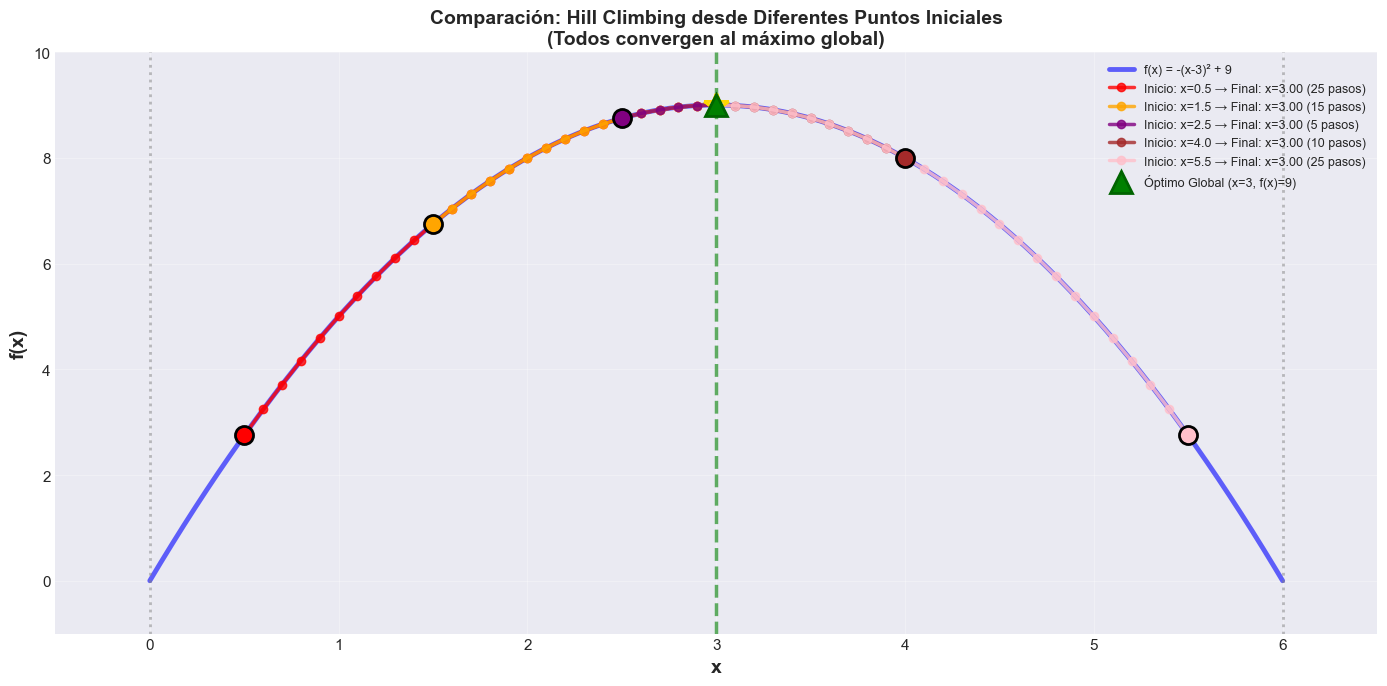


📊 TABLA RESUMEN DE RESULTADOS
Punto Inicio    Punto Final     f(x) Final      Pasos      ¿Óptimo?
----------------------------------------------------------------------
  x = 0.50       x = 3.0000     9.0000          25         ✅ Sí
  x = 1.50       x = 3.0000     9.0000          15         ✅ Sí
  x = 2.50       x = 3.0000     9.0000          5          ✅ Sí
  x = 4.00       x = 3.0000     9.0000          10         ✅ Sí
  x = 5.50       x = 3.0000     9.0000          25         ✅ Sí

📈 ESTADÍSTICAS:
   • Promedio de x final: 3.0000
   • Desviación estándar: 0.000000
   • Promedio de pasos: 16.0
   • Todos llegaron al óptimo: ✅ SÍ

💡 OBSERVACIÓN:
   Todos los caminos, independientemente del punto de inicio,
   convergen al mismo máximo global (x ≈ 3.0, f(x) ≈ 9.0).
   Esto demuestra la robustez de Hill Climbing en funciones unimodales.


In [5]:
# Experimento: Ejecutar Hill Climbing desde múltiples puntos iniciales
puntos_iniciales = [0.5, 1.5, 2.5, 4.0, 5.5]  # Diferentes puntos de partida
resultados = []

print("🧪 EXPERIMENTO: Hill Climbing desde Múltiples Puntos de Partida")
print("="*70)
print(f"Dominio: [0, 6] | Paso: {step} | Puntos de inicio: {puntos_iniciales}")
print("="*70)

for start in puntos_iniciales:
    print(f"\n{'='*70}")
    print(f"🎯 Ejecutando desde x = {start}")
    print(f"{'='*70}")
    x_f, hist = hill_climbing(start_x=start, step=step, domain=domain)
    resultados.append({
        'inicio': start,
        'final': x_f,
        'pasos': len(hist) - 1,
        'historial': hist
    })

# Visualizar todos los caminos juntos
plt.figure(figsize=(14, 7))

# Plotear la función
plt.plot(x_valores, y_valores, 'b-', linewidth=3.5, alpha=0.6, 
         label='f(x) = -(x-3)² + 9', zorder=1)

# Colores para cada camino
colores = ['red', 'orange', 'purple', 'brown', 'pink']

# Plotear cada camino
for i, res in enumerate(resultados):
    hist_array = np.array(res['historial'])
    f_hist = f(hist_array)
    plt.plot(hist_array, f_hist, 'o-', color=colores[i], linewidth=2.5, 
             markersize=6, alpha=0.8,
             label=f"Inicio: x={res['inicio']:.1f} → Final: x={res['final']:.2f} ({res['pasos']} pasos)",
             zorder=5)
    
    # Marcar inicio y fin
    plt.plot(hist_array[0], f_hist[0], 'o', color=colores[i], markersize=13, 
             markeredgewidth=2, markeredgecolor='black', zorder=6)
    plt.plot(hist_array[-1], f_hist[-1], '*', color=colores[i], markersize=18, 
             markeredgewidth=2, markeredgecolor='gold', zorder=6)

# Marcar el óptimo global
plt.axvline(x=3, color='green', linestyle='--', linewidth=2.5, alpha=0.6)
plt.plot(3, 9, 'g^', markersize=16, markeredgewidth=2, markeredgecolor='darkgreen',
         label='Óptimo Global (x=3, f(x)=9)', zorder=7)

# Límites del dominio
plt.axvline(x=0, color='gray', linestyle=':', linewidth=2, alpha=0.5)
plt.axvline(x=6, color='gray', linestyle=':', linewidth=2, alpha=0.5)

plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('f(x)', fontsize=14, fontweight='bold')
plt.title('Comparación: Hill Climbing desde Diferentes Puntos Iniciales\n(Todos convergen al máximo global)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=9)
plt.xlim(-0.5, 6.5)
plt.ylim(-1, 10)
plt.tight_layout()
plt.show()

# Tabla resumen de resultados
print("\n" + "="*70)
print("📊 TABLA RESUMEN DE RESULTADOS")
print("="*70)
print(f"{'Punto Inicio':<15} {'Punto Final':<15} {'f(x) Final':<15} {'Pasos':<10} {'¿Óptimo?'}")
print("-"*70)

for res in resultados:
    es_optimo = "✅ Sí" if abs(res['final'] - 3.0) < step else "⚠️ Cercano"
    print(f"  x = {res['inicio']:<10.2f} {'x = '}{res['final']:<10.4f} "
          f"{f(res['final']):<15.4f} {res['pasos']:<10} {es_optimo}")

print("="*70)

# Estadísticas
finales = [res['final'] for res in resultados]
promedio_final = np.mean(finales)
std_final = np.std(finales)
promedio_pasos = np.mean([res['pasos'] for res in resultados])

print(f"\n📈 ESTADÍSTICAS:")
print(f"   • Promedio de x final: {promedio_final:.4f}")
print(f"   • Desviación estándar: {std_final:.6f}")
print(f"   • Promedio de pasos: {promedio_pasos:.1f}")
print(f"   • Todos llegaron al óptimo: {'✅ SÍ' if std_final < step else '⚠️ NO'}")

print("\n💡 OBSERVACIÓN:")
print("   Todos los caminos, independientemente del punto de inicio,")
print("   convergen al mismo máximo global (x ≈ 3.0, f(x) ≈ 9.0).")
print("   Esto demuestra la robustez de Hill Climbing en funciones unimodales.")
print("="*70)